<IPython.core.display.Javascript object>


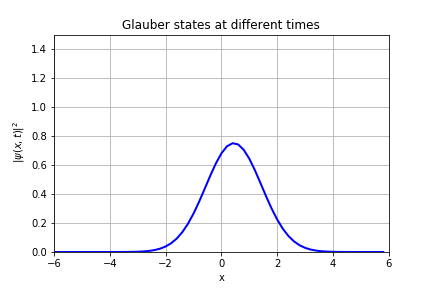

In [3]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased)
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2020. 
    Please respect copyright & acknowledge our work."""

# GlauberMatPlotAnimate.ipynb

# if doesn't run first time run it again
# GlauberState.py: Glauber's Coherent Quantum State
%matplotlib notebook

from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.animation import FuncAnimation

sqpi = np.sqrt(np.pi)
E = 3. ;  alpha = np.sqrt(E-0.5)        # E, Coherent Eigenvalue                             
factr = np.exp(-0.5*alpha*alpha)
nmax=20
def Hermite(x, n):                      # Hermite polynomial
    if(n == 0):
        p = 1.0
    elif(n == 1):
        p = 2*x
    else:
        p0 = 1
        p1 = 2*x
        for i in range(1,n):
            p2 = 2*x*p1-2*i*p0
            p0 = p1
            p1 = p2
            p = p2
    return p

def glauber(x,t,nmax):                  # Coherent state
    Reterm = 0.0
    Imterm = 0.0
    factr = np.exp(-0.5*alpha*alpha)
    for n in range (0, nmax):
        fact = np.sqrt(1.0/(math.factorial(n)*sqpi*(2**n)))
        psin = fact*Hermite(x,n)*np.exp(-0.5*x*x)
        den =np.sqrt(math.factorial(n))
        num = factr*(alpha**n)*psin
        Reterm += num*(np.cos((n+0.5)*t))/den
        Imterm += num*(np.sin((n+0.5)*t))/den
    phi = np.sqrt(Reterm*Reterm+Imterm*Imterm)
    return phi
fig = plt.figure()                             
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-6,6), ylim=(0, 1.5))
ax.grid()                         # Plot a grid
plt.title("Glauber states at different times")
plt.xlabel("x")
plt.ylabel (" $|\psi(x,t)|^2$")
line, = ax.plot([], [],"b", lw=2)  
def init():                              # base frame 
    line.set_data([],[])
    return line,
def animate(t):
   y = glauber(xx,0.3*t,nmax) # Find coherent stat
   
   line.set_data(xx,y)
   #leg=plt.legend(loc='best',ncol=4,mode="expand",shadow=True)
   return line,
xx = np.arange(-6.0,6.0,0.2)                   # range for x values  

ani=FuncAnimation(fig, animate, init_func=init,frames=10000,interval=200,blit=True)
plt.show()  
        
